# 결정 트리
- 결정 트리는 분류, 회귀, 다중 출력도 가능하며 매우 복잡한 데이터에서도 학습 가능한 강력한 모델이며 해석이 쉬움
- 데이터 전처리가 거의 필요하지 않음(특히 스케일 조정), 훈련 세트에 민감함
- 사이킷런은 CART(이진 트리)만을 사용, ID3와 같은 여러 경우도 만들 수 있음

In [1]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "6"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

## 6.1 결정 트리 학습과 시각화

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier # 분류 결정 트리

iris = load_iris()
X = iris.data[:, 2:] # petal length, petal width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [3]:
from sklearn.tree import export_graphviz # export_graphviz ==> 결정 트리 시각화하는 함수

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

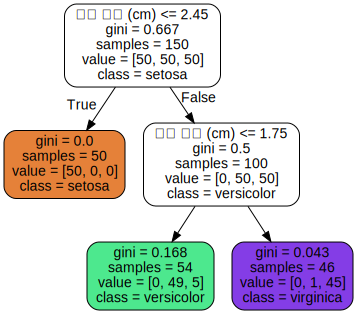

In [4]:
import graphviz
with open("images/6/iris_tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='images/6', cleanup=True)
dot

##### 해석 (새로운 샘플이 들어올 경우)
- 먼저 루트 노드(깊이 0인 맨 꼭대기 노드)에 들어와 꽃잎 길이가 2.45보다 긴지 아닌지 판별
- 2.45 이하면 왼쪽 자식 노드로 들어가고 이는 리프 노드(자식 노드가 없는 노드)이므로 추가적 검사는 없으며 class를 setosa로 예측
- 2.45 초과면 오른쪽 자식 노드로 들어가고 이후 꽃잎 너비 1.75를 기준으로 분리
- samples ==> [실제 class 0인 수,실제 class 1인 수, 실제 class 2인 수] // gini ==> 불순도 // max_depth=2이므로 깊이는 2까지만

## 6.2 예측하기

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


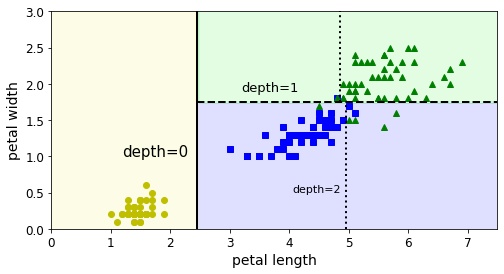

In [5]:
# 결정 경계 그리기
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100) # 0 ~ 7.5 범위 100개로 나누기
    x2s = np.linspace(axes[2], axes[3], 100) # 0 ~ 3 범위 100개로 나누기
    x1, x2 = np.meshgrid(x1s, x2s) # meshgrid ==> 두 배열의 가능한 조합을 모두 생성
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape) # 예측
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris: # iris 데이터 아닌 경우(기본값 True)
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training: # plot_training 인 경우(기본값 True)
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa") # class=0 : setosa
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor") # class=1 : versicolor
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica") # class=2 : virginica
        plt.axis(axes) # 축 범위는 axes로
    if iris: # 아이리스인 경우(기본값 True)
        plt.xlabel("petal length", fontsize=14) # x축 이름
        plt.ylabel("petal width", fontsize=14) # y축 이름
    else: # 아이리스 아닌 경우(기본값 True)
        plt.xlabel(r"$x_1$", fontsize=18) # x축 이름
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0) # y축 이름
    if legend: # legend값 True인 경우
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.20, 1.0, "depth=0", fontsize=15)
plt.text(3.2, 1.90, "depth=1", fontsize=13)
plt.text(4.05, 0.5, "depth=2", fontsize=11)
plt.show() # depth=2이므로 불순도가 남아있어도 멈춤(노란면의 경우 완전히 순수하므로 멈춤) // 이를 기반으로 class 확률 추정

## 6.3 클래스 확률 추정

In [6]:
tree_clf.predict_proba([[5, 1.5]]) # (5,1.5)는 파란면에 속함 여기의 경우 (0/54, 49/54, 5/54)

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]]) # 가장 확률 높은 1로 예측

array([1])

## 6.4 CART 훈련 알고리즘
- CART 알고리즘은 탐욕적 알고리즘으로 설정된 깊이에 대해 가장 낮은 불순도를 고려하지 않음(즉, 최선의 모델이 아닐 수 있음)
- 최적의 트리를 찾는 것은 NP-완전문제로 O(exp(m))으로 계산량이 기하급수적을 증가함

## 6.5 계산 복잡도
- 예측을 하려면 루프 노드에서 리프 노드까지 탐색하는데 일반적으로 결정 트리는 거의 균형을 이루고 있으므로 결정 트리를 탐색하기 위해서는 O(log2(m))개의 노드(한 특성에 1 리프노드로 계산 // 깊이 d에서 리프 노드의 수 2^d = m 으로 계산)를 거쳐야 함
- 각 노드는 하나의 특성 값만 확인하므로 예측에 필요한 전체 복잡도는 특성과 무관하게 O(log2(m))으로 큰 데이터에서도 빠름
- 훈련 알고리즘은 각 노드에서 모든 훈련 샘플의 특성을 비교하므로 훈련 복잡도는 O(n*m*log(m))이 됨
- 만약 훈련 세트가 수천 개 이하라면 사이킷런은 presort=True로 지정하여 미리 데이터를 정렬하면 훈련 속도의 향상 가능

## 6.6 지니 불순도 또는 엔트로피?
- 분류의 경우 criterion 매개변수 기본값은 gini, 회귀의 경우 criterion 매개변수 기본값은 mse
- 결정 트리는 기본적으로 지니 불순도를 사용하지만 criterion 매개변수를 entropy로 지정시 엔트로피(정보 이득) 불순도를 사용 가능
- 지니 불순도: 계산 속도가 좀 더 빨라 선호되나 다른 트리가 만들어지는 경우 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 존재
- 엔트로피: 계산 속도가 조금 느리지만 균형 잡힌 트리를 생성

## 6.7 규제 매개변수
- 결정 트리는 훈련 데이터 제약사항이 거의 없음(ex- 선형의 경우 데이터가 선형일 것으로 가정) 다만 제한을 안 두면 과대적합되기 쉬움
- 훈련이 되기 전 파라미터의 수가 결정되지 않는 모델을 비파라미터 모델이라고 하며 반대의 경우는 파라미터 모델이라고 함
- max_depth: 최대 깊이(기본값 None)
- min_samples_split: 분할되기 전 가져야 하는 최소 샘플 수
- min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
- min_weight_fraction_leaf: min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- max_leaf_nodes: 리프 노드의 최대 수
- max_features: 각 노드에서 분할에 사용할 최대 특성의 수(랜덤)
- min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 규제가 커짐
- 규제 없이 진행 후 가지치기의 방법도 존재

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


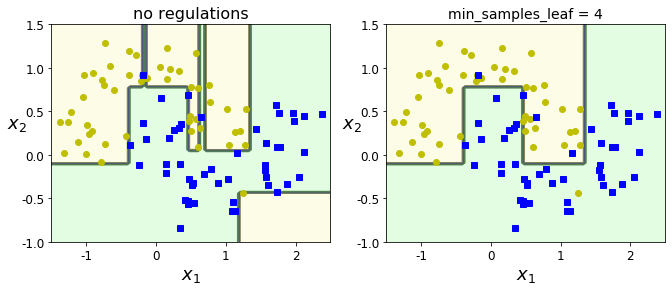

In [8]:
# 규제에 따른 분류 그래프
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53) # make_moons 샘플 100개 생성

deep_tree_clf1 = DecisionTreeClassifier(random_state=42) # 규제 없음
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42) # 리프 노드 최소 수=4 규제 있음
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False) # plot_decision_boundary 사용자 정의 함수 사용
plt.title("no regulations", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.show() # 왼쪽 모델의 경우 과대적합되어 오른쪽과 같이 규제 모델이 더 일반화가 잘 된 것으로 보임

## 6.8 회귀
- 데이터가 해당하는 리프 노드의 값들의 평균값을 예측함

In [9]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200 # sample size
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [10]:
from sklearn.tree import DecisionTreeRegressor # 회귀 결정 트리

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

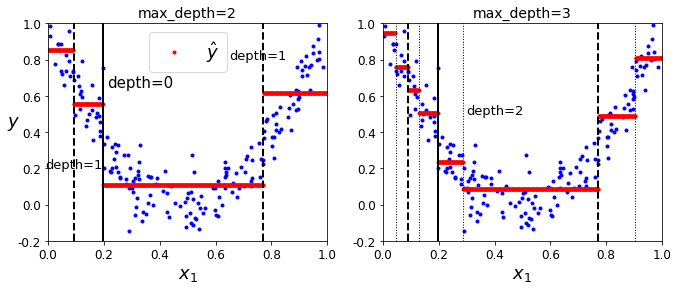

In [11]:
# 규제 정도에 따른 회귀 예측
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2) # 깊이=2 모델
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3) # 깊이=3 모델
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1) # 0과 1사이 500개로 나누기
    y_pred = tree_reg.predict(x1) # 예측
    plt.axis(axes) # 축 범위는 axes
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel: # ylabel이 True이면(기본값 y)
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.") # X,y 청색점으로 표시(예측 전 값)
    plt.plot(x1, y_pred, "r.", linewidth=2, label=r"$\hat{y}$") # x1, y_pred 적색점으로 표시(예측 후 값)
    
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2) # y축 평행 직선 생성(0.1973, 0.0917, 0.7718)
plt.text(0.21, 0.65, "depth=0", fontsize=15)
plt.text(-0.01, 0.2, "depth=1", fontsize=13)
plt.text(0.65, 0.8, "depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")): # y축 평행 직선 생성(0.1973, 0.0917, 0.7718)
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)
plt.show() # 빨간 점들이 모여 선으로 된 것이 예측된 값(2^depth 수의 값만큼 예측이 됨 -> 이는 다음 그림 확인)

In [12]:
# 깊이 2 모델을 시각화
export_graphviz(
        tree_reg1,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

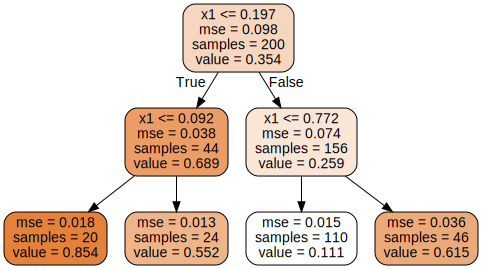

In [13]:
import graphviz
with open("images/6/regression_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='regression_tree', directory='images/6', cleanup=True)
dot # 각 리프 노드마다 value 값을 예측하였고 각각의 mse를 구함

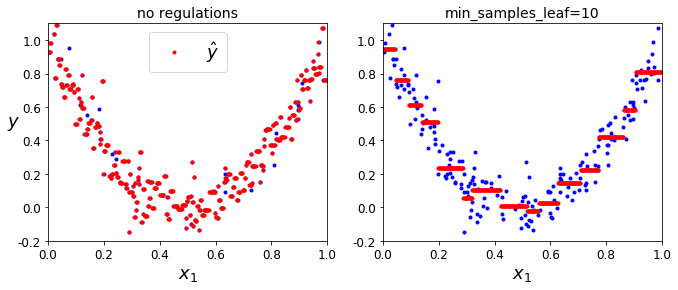

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42) # 규제 없는 모델
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10) # 리프 노드 최소 샘플=10 규제모델
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1) # 0~1 500개로 나눔
y_pred1 = tree_reg1.predict(x1) # 1번 모델로 예측
y_pred2 = tree_reg2.predict(x1) # 2번 모델로 예측

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.") # X,y 청색점으로 표시(예측 전 값)
plt.plot(x1, y_pred1, "r.", linewidth=2, label=r"$\hat{y}$") # x1,y_pred1 적색점으로 표시(예측 후 값)
plt.axis([0, 1, -0.2, 1.1]) # 축 범위 설정
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("no regulations", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.") # X,y 청색점으로 표시(예측 전 값)
plt.plot(x1, y_pred2, "r.", linewidth=2, label=r"$\hat{y}$") # x1,y_pred2 적색점으로 표시(예측 후 값)
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show() # 규제가 없을 경우 왼쪽 모델과 같이 과대적합이 됨, 규제가 있는 오른쪽 모델이 훨씬 일반화 잘 되었음

## 6.9 불안정성
- 결정 트리의 경우 계단 모양의 결정 트리를 만들기 때문에 훈련 세트의 회전에 민감 => 훈련 세트를 더 좋은 방향으로 회전시키는 PCA로 해결(8장)
- 결정 트리는 훈련 데이터에 있는 작은 변화에도 민감하게 반응

In [15]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [16]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[4.8, 1.8]])

In [17]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2) # 가장 너비가 큰 데이터 제거
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

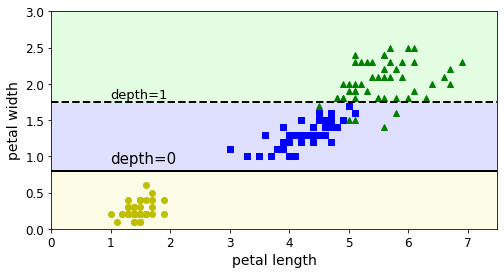

In [18]:
# 가장 너비가 큰 데이터 제거 후 그래프
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "depth=0", fontsize=15)
plt.text(1.0, 1.80, "depth=1", fontsize=13)
plt.show() # 훈련 데이터 1개의 차이로 기존 그래프와 많이 달라짐

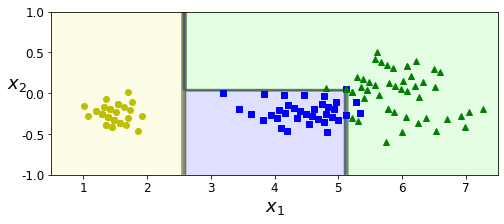

In [19]:
# 회전 후 결정 트리 모델 그래프
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]) # 회전 행렬 생성
Xr = X.dot(rotation_matrix) # Xr -> X를 angle만큼 회전시킨 값

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False) # plot_decision_boundary 사용자 정의 함수
plt.show()

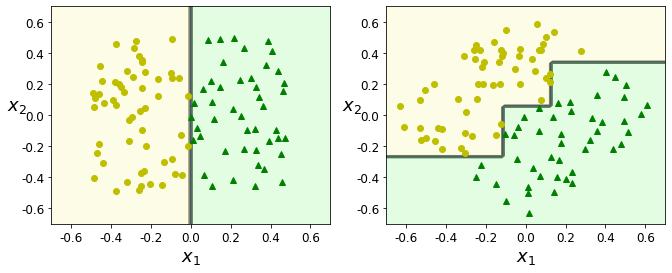

In [20]:
# 원본과 45도 회전 후 결정 트리 비교
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]) # 회전 행렬 생성
Xsr = Xs.dot(rotation_matrix) # Xr -> X를 angle만큼 회전시킨 값

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.show() # 45도 회전한 오른쪽의 경우 불필요하게 구불구불함(오른쪽 모델은 잘 일반화가 안된것으로 추정)

## 6.10 연습문제

#### 1. 백만 개의 샘플을 가진 훈련 세트에서(규제 없이) 훈련시킨 결정 트리의 깊이는 대략 얼마일까요?
- m개의 리프 노드를 포함한 균형이 잘 잡힌 이진 트리의 깊이는 log2(m)을 반올림한 것과 같다. 이진 결정 트리(사이킷런에 있는 모든 트리는 가지가 두개)를 제한을 두지 않고 훈련시키면 훈련 샘플마다 하나의 리프 노드가 되므로 어느정도 균형이 잘 잡힌 트리가 됩니다. 따라서 훈련 세트에 백만 개 샘플이 있었다면 결정 트리의 깊이는 20이 될 것입니다(실제로는 완벽하게 균형 잡힌 트리가 만들어지지 않기 때문에 조금 더 늘어남).

#### 2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을까요, 아니면 클까요? 일반적으로 작거나 클까요, 아니면 항상 작거나 클까요?
- 한 노드의 지니 불순도는 일반적으로 부모의 불순도보다 낮습니다. 이는 자식의 지니 불순도의 가중치 합이 최소화되는 방향으로 각 노드를 분할하는 CART 훈련 알고리즘의 비용 함수 때문입니다. 그러나 다른 자식 노드의 지니 불순도 감소량이 어떤 노드의 불순도 증가량보다 큰 경우라면 부모의 불순도보다 큰 노드가 생길 수 있습니다.

#### 3. 결정 트리가 훈련 세트에 과대적합되었다면 max_depth를 줄이는 것이 좋을까요?
- 결정 트리가 훈련 세트에 과대적합되었다면 모델에 제약을 가해 규제해야 하므로 max_depth를 낮추는 것이 좋다.

#### 4. 결정 트리가 훈련 세트에 과소적합되었다면 입력 특성의 스케일을 조정하는 것이 좋을까요?
- 결정 트리는 훈련 데이터의 스케일이나 원점에 맞추어져 있는지 상관하지 않는다. 이것은 결정 트리의 장점 중 하나이다. 그러므로 결정 트리가 훈련 세트에 과소적합 되었다고 입력 특정의 스케일을 조정하는 것은 시간낭비이다.

#### 5. 백만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는데 한 시간이 걸렸다면, 천만 개의 샘플을 가진 훈련 세트에 결정 트리를 훈련시키는데 대략 얼마나 걸릴까요?
- 결정 트리 훈련의 계산 복잡도는 O(m*n*log(m))입니다. 그러므로 훈련 세트의 크기에 10을 곱하면 훈련 시간은 K=10*log(10m)배 늘어납니다. 만약 m=10^6이라면 K는 대략 11.7이므로 훈련에 대략 11.7시간이 걸릴 것으로 예상할 수 있다.

#### 6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는 것이 훈련 속도를 높일까요?
- 데이터셋의 샘플 수가 수천 개 미만일 때 훈련 세트를 사전에 정렬하여 훈련 속도를 높일 수 있다. 그러나 100,000개의 샘플일 경우에는 presort=True로 지정하면 훈련 속도가 매우 느려질 것이다.

#### 7. moons 데이터셋에 결정 트리를 훈련시키고 세밀하게 튜닝해보세요
- a. make_moons(n_samples=1000, noise=0.4)를 사용해 데이터셋을 생성합니다.
- b. 이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나눕니다.
- c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행합니다.(GridSearchCV를 사용하면 됩니다.). 힌트: 여러 가지 max_leaf_nodes 값을 시도해보세요.
- d. 찾은 매개변수를 사용해 전체 훈련 세트에 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정합니다. 대략 85~87%가 나올 것입니다.

In [21]:
# a
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

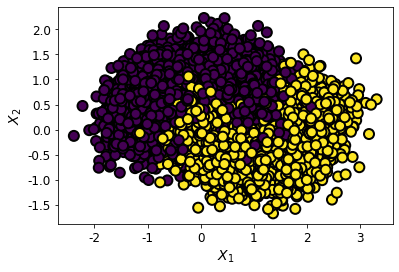

In [22]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

In [23]:
# b
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# c
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 200, 4)), 'min_samples_split': [3, 5, 7], 'splitter': ['best', 'random']}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 825 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    4.0s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 6, 10, 14, 18, 22, 26, 30, 34,
    

In [25]:
grid_search_cv.best_params_

{'max_leaf_nodes': 18, 'min_samples_split': 3, 'splitter': 'best'}

In [26]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=18,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [27]:
# d
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [28]:
# 추가
params = {'max_leaf_nodes': list(range(2, 50)), 'min_samples_split': [1, 2, 3, 4, 5]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:    1.3s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [29]:
grid_search_cv.best_params_

{'max_leaf_nodes': 17, 'min_samples_split': 2}

In [30]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

#### 8. 랜덤 포레스트를 만들어보세요
- a. 이전 연습문제에 이어서, 훈련 세트의 서브셋을 1000개 생성합니다. 각각은 무작위로 선택된 1000개의 샘플을 담고 있습니다. 힌트: 사이킷런의 Shufflesplit을 사용할 수 있습니다.
- b. 앞으로 찾은 최적의 매개변수를 사용해 각 서브셋에 결정 트리를 훈련시킵니다. 테스트 세트로 이 1000개의 결정 트리를 평가합니다. 더 작은 데이터셋에서 훈련되었기 때문에 이 결정 트리는 앞서 만든 결정 트리보다 성능이 떨어져 약 80%의 정확도를 냅니다.
- c. 이제 마술을 부릴 차례입니다. 각 테스트 세트 샘플에 대해 1000개의 결정 트리 예측을 만들고 다수로 나온 예측만 취합니다(사이파이의 mode() 함수를 사용할 수 있습니다). 그러면 테스트 세트에 대한 다수결 예측이 만들어집니다.
- d. 테스트 세트에서 이 예측을 평가합니다. 앞서 만든 모델보다 조금 높은 (약 0.5~1.5%정도) 정확도를 얻게 될 것입니다. 축하합니다. 랜덤 포레스트 분류기를 훈련시켰습니다!

In [31]:
# a
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [32]:
# b
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

np.mean(accuracy_scores)

0.8054499999999999

In [33]:
# c
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [34]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [35]:
# d
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872